In [ ]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Bank-Marketing-Data-Analysis/master/Data/bank-additional-preprocessed-mode-standardize-train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Bank-Marketing-Data-Analysis/master/Data/bank-additional-preprocessed-mode-standardize-test.csv')
del df_train['Unnamed: 0']
del df_test['Unnamed: 0']


df_train_class = pd.DataFrame(df_train['y'])    
df_train_features = df_train.loc[:, df_train.columns != 'y']

df_test_class = pd.DataFrame(df_test['y'])
df_test_features = df_test.loc[:, df_test.columns != 'y']

In [ ]:
df_train.head()

,age,education,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,...,4,5,6,7,8,9,10,11,12,13
0,1.139714,14,0,0,1,8,2,-0.610219,-0.354293,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.753802,14,1,0,1,11,3,-0.206327,-0.354293,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.307455,11,0,0,0,5,4,3.024816,-0.354293,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.693367,14,1,0,1,11,4,-0.610219,-0.354293,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.271413,11,0,0,0,5,1,-0.610219,-0.354293,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
df_train.columns

Index(['age', 'education', 'housing', 'loan', 'contact', 'month',
       'day_of_week', 'campaign', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', '0',
       '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13'],
      dtype='object')

In [ ]:
# separate Continuous and Multinmoial Features
continuous_features = ['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

df_train_features_cont = df_train_features.loc[:,df_train_features.columns.isin(continuous_features)]
df_train_features_cate =  df_train_features.loc[:,~df_train_features.columns.isin(continuous_features)]

df_test_features_cont = df_test_features.loc[:, df_test_features.columns.isin(continuous_features)]
df_test_features_cate =  df_test_features.loc[:,~df_test_features.columns.isin(continuous_features)]


In [ ]:
# Fit Gaussian NB model
gaussian_nb = GaussianNB()
gaussian_nb.fit(df_train_features_cont, df_train_class)

gaussian_predicted_prob_train = gaussian_nb.predict_proba(df_train_features_cont)
gaussian_predicted_prob_test = gaussian_nb.predict_proba(df_test_features_cont)

# Fit Multinomial NB model
multinomial_nb = MultinomialNB()
multinomial_nb.fit(df_train_features_cate, df_train_class)

multinomial_predicted_prob_train = multinomial_nb.predict_proba(df_train_features_cate)
multinomial_predicted_prob_test = multinomial_nb.predict_proba(df_test_features_cate)

# Fit probabilites on Gaussian again

combined_predicted_prob_train = np.vstack([gaussian_predicted_prob_train[:,1],multinomial_predicted_prob_train[:,1]]).T
combined_predicted_prob_test = np.vstack([gaussian_predicted_prob_test[:,1],multinomial_predicted_prob_test[:,1]]).T

gaussian_nb_final = GaussianNB()
gaussian_nb_final.fit(combined_predicted_prob_train, df_train_class)

predicted_train = gaussian_nb_final.predict(combined_predicted_prob_train)
predicted_test = gaussian_nb_final.predict(combined_predicted_prob_test)

predicted_prob_train = gaussian_nb_final.predict_proba(combined_predicted_prob_train)
predicted_prob_test = gaussian_nb_final.predict_proba(combined_predicted_prob_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report

def evaluate_classifier_performance(df_train_class, predicted_train, predicted_prob_train, df_test_class, predicted_test, predicted_prob_test, roc_y_n):
    ### Confusion Matrix
    confusion_matrix_train = confusion_matrix(df_train_class, predicted_train)
    confusion_matrix_test = confusion_matrix(df_test_class, predicted_test)
    print ("\nTraining Confusion Matrix:\n ", confusion_matrix_train)
    print ("\nTesting Confusion Matrix:\n ", confusion_matrix_test)
 
    ### Accuracy score
    score_train = accuracy_score(df_train_class, predicted_train)
    score_test = accuracy_score(df_test_class, predicted_test)
    print ("\nTraining Accuracy Score: ", score_train)
    print ("\nTesting Accuracy Score: ", score_test)
       
    ### Precision, Recall  
    precision_train = precision_score(df_train_class, predicted_train)
    precision_test = precision_score(df_test_class, predicted_test)
    print ("\nTraining Precision: ", precision_train)
    print ("\nTesting Precision: ", precision_test)
    
    recall_train = recall_score(df_train_class, predicted_train)
    recall_test = recall_score(df_test_class, predicted_test)
    print ("\nTraining Recall: ", recall_train)
    print ("\nTesting Recall: ", recall_test)
    
    ### Classification Report
    print ("\nTrain Classification Report: \n",classification_report(df_train_class, predicted_train))
    print ("\nTest Classification Report: \n",classification_report(df_test_class, predicted_test))

    ### F1 Score
    f1score_train = f1_score(df_train_class, predicted_train)#, average='weighted')
    f1score_test = f1_score(df_test_class, predicted_test)#, average='weighted')
    print ("\nTraining F1score: ", f1score_train)
    print ("\nTesting F1score: ", f1score_test)
    
    f1score_train = f1_score(df_train_class, predicted_train, average='weighted')
    f1score_test = f1_score(df_test_class, predicted_test, average='weighted')
    print ("\nTraining Weigted F1score: ", f1score_train)
    print ("\nTesting Weighted F1score: ", f1score_test)
    
    
    ### ROC-AUC
    if roc_y_n == 'y':
        fpr, tpr, threshold = roc_curve(df_train_class, predicted_prob_train[:,1])
        roc_auc_train = auc(fpr, tpr)
        print ("\nTraining AUC for ROC: ",roc_auc_train)
        plt.figure()
        plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_train)
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.legend(loc = 'lower right')
        plt.title('Training - Receiver Operating Characteristic')
        
        fpr, tpr, threshold = roc_curve(df_test_class, predicted_prob_test[:,1])
        roc_auc_test = auc(fpr, tpr)
        print ("\nTesting AUC for ROC: ",roc_auc_test)
        plt.figure()
        plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_test)
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.legend(loc = 'lower right')
        plt.title('Testing - Receiver Operating Characteristic')


Training Confusion Matrix:
  [[2565  180]
 [ 225  119]]

Testing Confusion Matrix:
  [[864  59]
 [ 80  27]]

Training Accuracy Score:  0.8688896082874716

Testing Accuracy Score:  0.8650485436893204

Training Precision:  0.3979933110367893

Testing Precision:  0.313953488372093

Training Recall:  0.34593023255813954

Testing Recall:  0.2523364485981308

Train Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.93      0.93      2745
           1       0.40      0.35      0.37       344

    accuracy                           0.87      3089
   macro avg       0.66      0.64      0.65      3089
weighted avg       0.86      0.87      0.86      3089


Test Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       923
           1       0.31      0.25      0.28       107

    accuracy                           0.87      1030
   macro avg       0.61      0.59   

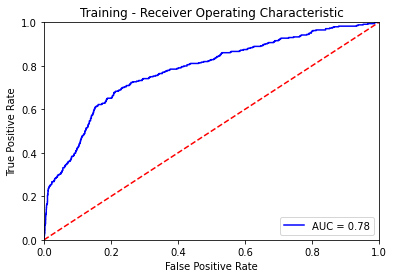

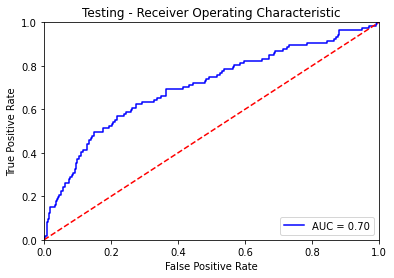

In [ ]:
evaluate_classifier_performance(df_train_class, predicted_train, predicted_prob_train, df_test_class, predicted_test, predicted_prob_test, 'y')
